In [32]:
import pandas as pd
data=pd.read_csv("TempData/q3_PaiXiChengFen.csv",encoding='utf-8')
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

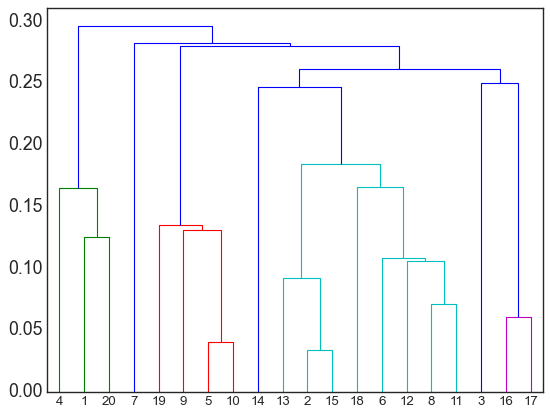

In [33]:
import scipy as sp
import scipy.cluster.hierarchy as sch
A=data.values
B=sch.distance.pdist(A,metric='euclidean')
Z=sch.linkage(B,'single')
s=[str(i+1) for i in range(20)]
H=sch.dendrogram(Z,p=40,labels=s)

In [34]:
from sklearn import preprocessing as pp
d=B
dd=sch.distance.squareform(d)
z=sch.linkage(d)
print(z)

[[1.00000000e+00 1.40000000e+01 3.40277470e-02 2.00000000e+00]
 [4.00000000e+00 9.00000000e+00 4.01573688e-02 2.00000000e+00]
 [1.50000000e+01 1.60000000e+01 6.00461503e-02 2.00000000e+00]
 [7.00000000e+00 1.00000000e+01 7.12689941e-02 2.00000000e+00]
 [1.20000000e+01 2.00000000e+01 9.21187201e-02 3.00000000e+00]
 [1.10000000e+01 2.30000000e+01 1.05844442e-01 3.00000000e+00]
 [5.00000000e+00 2.50000000e+01 1.08174533e-01 4.00000000e+00]
 [0.00000000e+00 1.90000000e+01 1.25063903e-01 2.00000000e+00]
 [8.00000000e+00 2.10000000e+01 1.30727056e-01 3.00000000e+00]
 [1.80000000e+01 2.80000000e+01 1.34887757e-01 4.00000000e+00]
 [3.00000000e+00 2.70000000e+01 1.64930069e-01 3.00000000e+00]
 [1.70000000e+01 2.60000000e+01 1.65461013e-01 5.00000000e+00]
 [2.40000000e+01 3.10000000e+01 1.84476066e-01 8.00000000e+00]
 [1.30000000e+01 3.20000000e+01 2.47027667e-01 9.00000000e+00]
 [2.00000000e+00 2.20000000e+01 2.50162477e-01 3.00000000e+00]
 [3.30000000e+01 3.40000000e+01 2.61552896e-01 1.200000

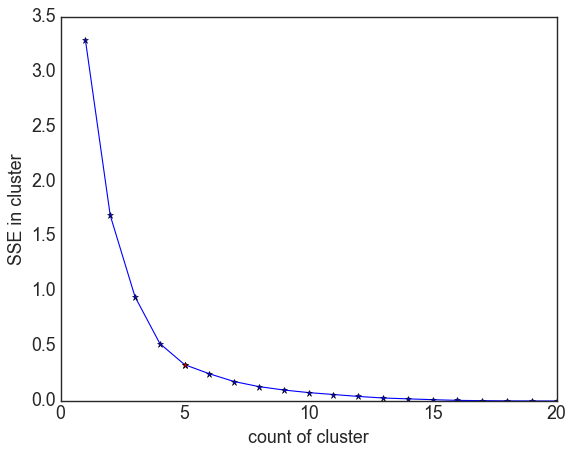

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
TSSE=[]
K=20
for k in range(1,K+1):
    SSE=[]
    md=KMeans(n_clusters=k)
    md.fit(A)
    labels=md.labels_
    centers=md.cluster_centers_
    for label in set(labels):
        SSE.append(np.sum((A[labels==label,:]-centers[label,:])**2))
    TSSE.append(np.sum(SSE))
plt.figure(2)
plt.plot(range(1,K+1),TSSE,'b*-')
plt.plot(5,TSSE[4],'r*')
plt.xlabel("count of cluster")
plt.ylabel("SSE in cluster")
plt.show()

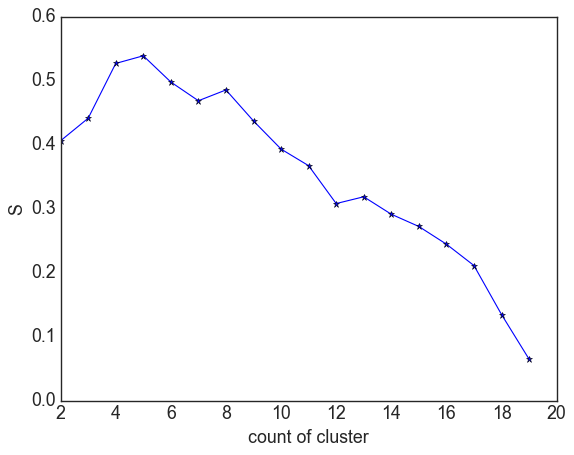

In [36]:
from sklearn import metrics
X=A
S=[]
K=19
for k in range(2,K+1):
    md=KMeans(k)
    md.fit(A)
    labels=md.labels_
    S.append(metrics.silhouette_score(X,labels,metric='euclidean'))
plt.rc('font',size=16)
plt.plot(range(2,K+1),S,'b*-')
plt.xlabel('count of cluster')
plt.ylabel('S')
plt.show()

In [37]:
md=KMeans(n_clusters=5)
md.fit(A)
labels=1+md.labels_
print(labels,'\n----------\n',centers)

[5 2 3 5 4 1 4 1 4 4 1 1 2 3 2 3 3 2 4 5] 
----------
 [[0.36633663 0.58415842 0.         0.00990099 0.03960396]
 [0.18181818 0.36363636 0.         0.         0.45454545]
 [0.75       0.25       0.         0.         0.        ]
 [0.53323486 0.33530281 0.00147711 0.11521418 0.01477105]
 [0.20192308 0.27884615 0.04326923 0.40384615 0.07211539]
 [0.12561576 0.63546798 0.         0.02216749 0.21674877]
 [0.         0.14285714 0.         0.         0.85714286]
 [0.         0.34       0.         0.02       0.64      ]
 [0.70212766 0.07092199 0.         0.21276596 0.0141844 ]
 [0.62445415 0.31441048 0.         0.02620087 0.0349345 ]
 [0.33333333 0.33333333 0.         0.33333333 0.        ]
 [0.08695652 0.56521739 0.         0.         0.34782609]
 [0.24750712 0.37571225 0.06196581 0.28881766 0.02564103]
 [0.19101124 0.59550562 0.         0.11235955 0.1011236 ]
 [0.34567901 0.51851852 0.         0.04938272 0.08641975]
 [0.08421053 0.72631579 0.         0.         0.18947368]
 [0.08641975 0.64